In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import gudhi as gd 
import pickle

# Create a Synthetic Networks with the same number of nodes and edges from PCD CCN

In [2]:
# ["Graph named 'Consensus PCD' with 170 nodes and 1840 edges"]

In [3]:
G_random_erdos = nx.erdos_renyi_graph(170,0.12571,seed=0)
print(G_random_erdos)
print(nx.density(G_random_erdos))

Graph with 170 nodes and 1840 edges
0.1280891054646711


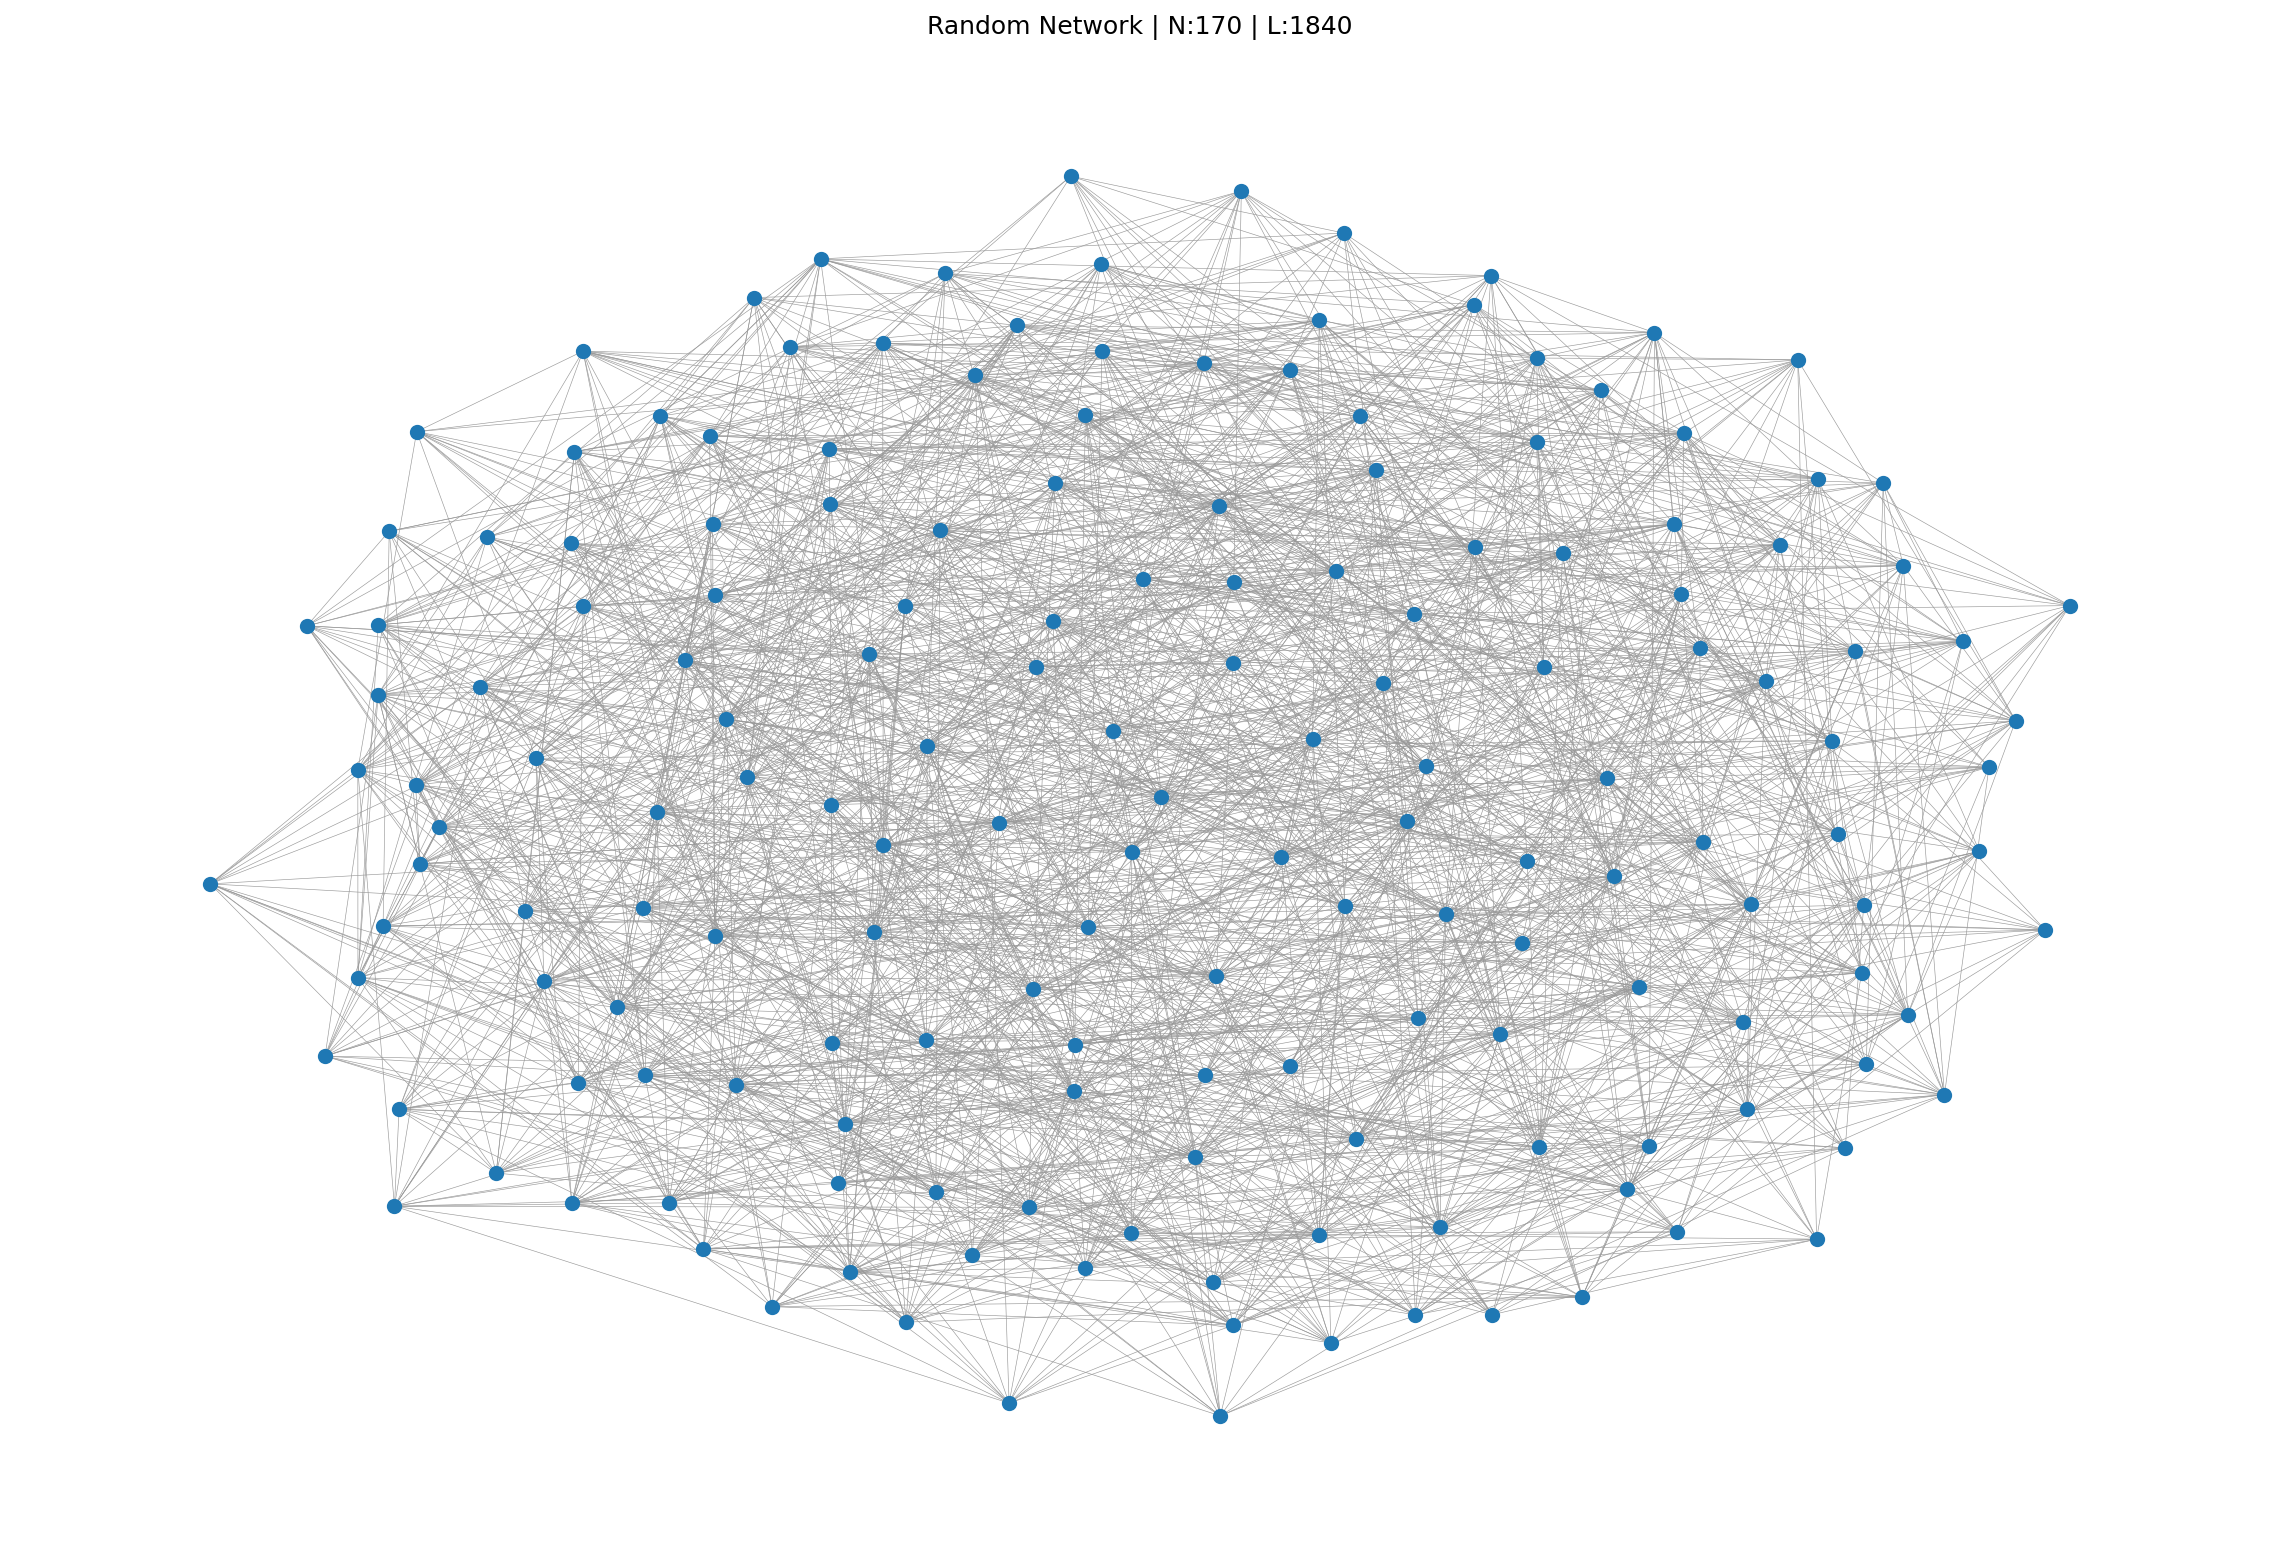

In [4]:
plt.figure(figsize=(15,10),dpi=150)
nx.draw_kamada_kawai(G_random_erdos,with_labels=0,node_size=40,width=0.3,edge_color='#999')
plt.title('Random Network | N:'+str(len(G_random_erdos.nodes))+' | L:'+str(len(G_random_erdos.edges)))
plt.show()

# Persistence Homology

In [5]:
def persistantHomologyFromNetworkWithRips(G,name,dim,plot=True):      
    dm=pd.DataFrame(dict(nx.shortest_path_length(G))).sort_index()
    dm=dm[sorted(dm.columns)]
    skeleton = gd.RipsComplex(distance_matrix = dm.values) 

    Rips_simplex_tree = skeleton.create_simplex_tree(max_dimension = dim)
    
    BarCode = Rips_simplex_tree.persistence()
      
    #----Simplexes Resume
    simplexesLen={}
    for simplex,filtration in Rips_simplex_tree.get_filtration():
        if(len(simplex)-1 not in simplexesLen):
            simplexesLen[len(simplex)-1]=1
        else:
            simplexesLen[len(simplex)-1]+=1    

    simplexesResume=''
    for item in simplexesLen.items():
        simplexesResume+=str(item[0])+': '+str(item[1])+' | '
    simplexesResume[0:-3]  
    
    #----Barcode Resume
    
    dimensionsLen={}
    for dim in range(0,dim+1):
        dimensionsLen[dim]=len([bd for bd in BarCode if (bd[0]==dim)])

    dimensionResume=''
    for item in dimensionsLen.items():
        dimensionResume+=str(item[0])+': '+str(item[1])+' | '
    dimensionResume[0:-3]    
            
    #--Plot
    if plot:
        plt.figure(figsize=(10,5),dpi=250)
        gd.plot_persistence_barcode(BarCode,axes=plt.gca());    
        plt.title(name+'\n Simplexes: '+simplexesResume[0:-3]+'\n Numbers of Bars: '+dimensionResume[0:-3],fontsize=9)
        plt.tight_layout()
        plt.savefig('./4 output/Barcode - '+name+' - Rips.png',dpi=500,facecolor='white')
        plt.show()
    
    with open('4 output/'+name+'.pkl',mode='wb') as f:
        pickle.dump(BarCode,f)

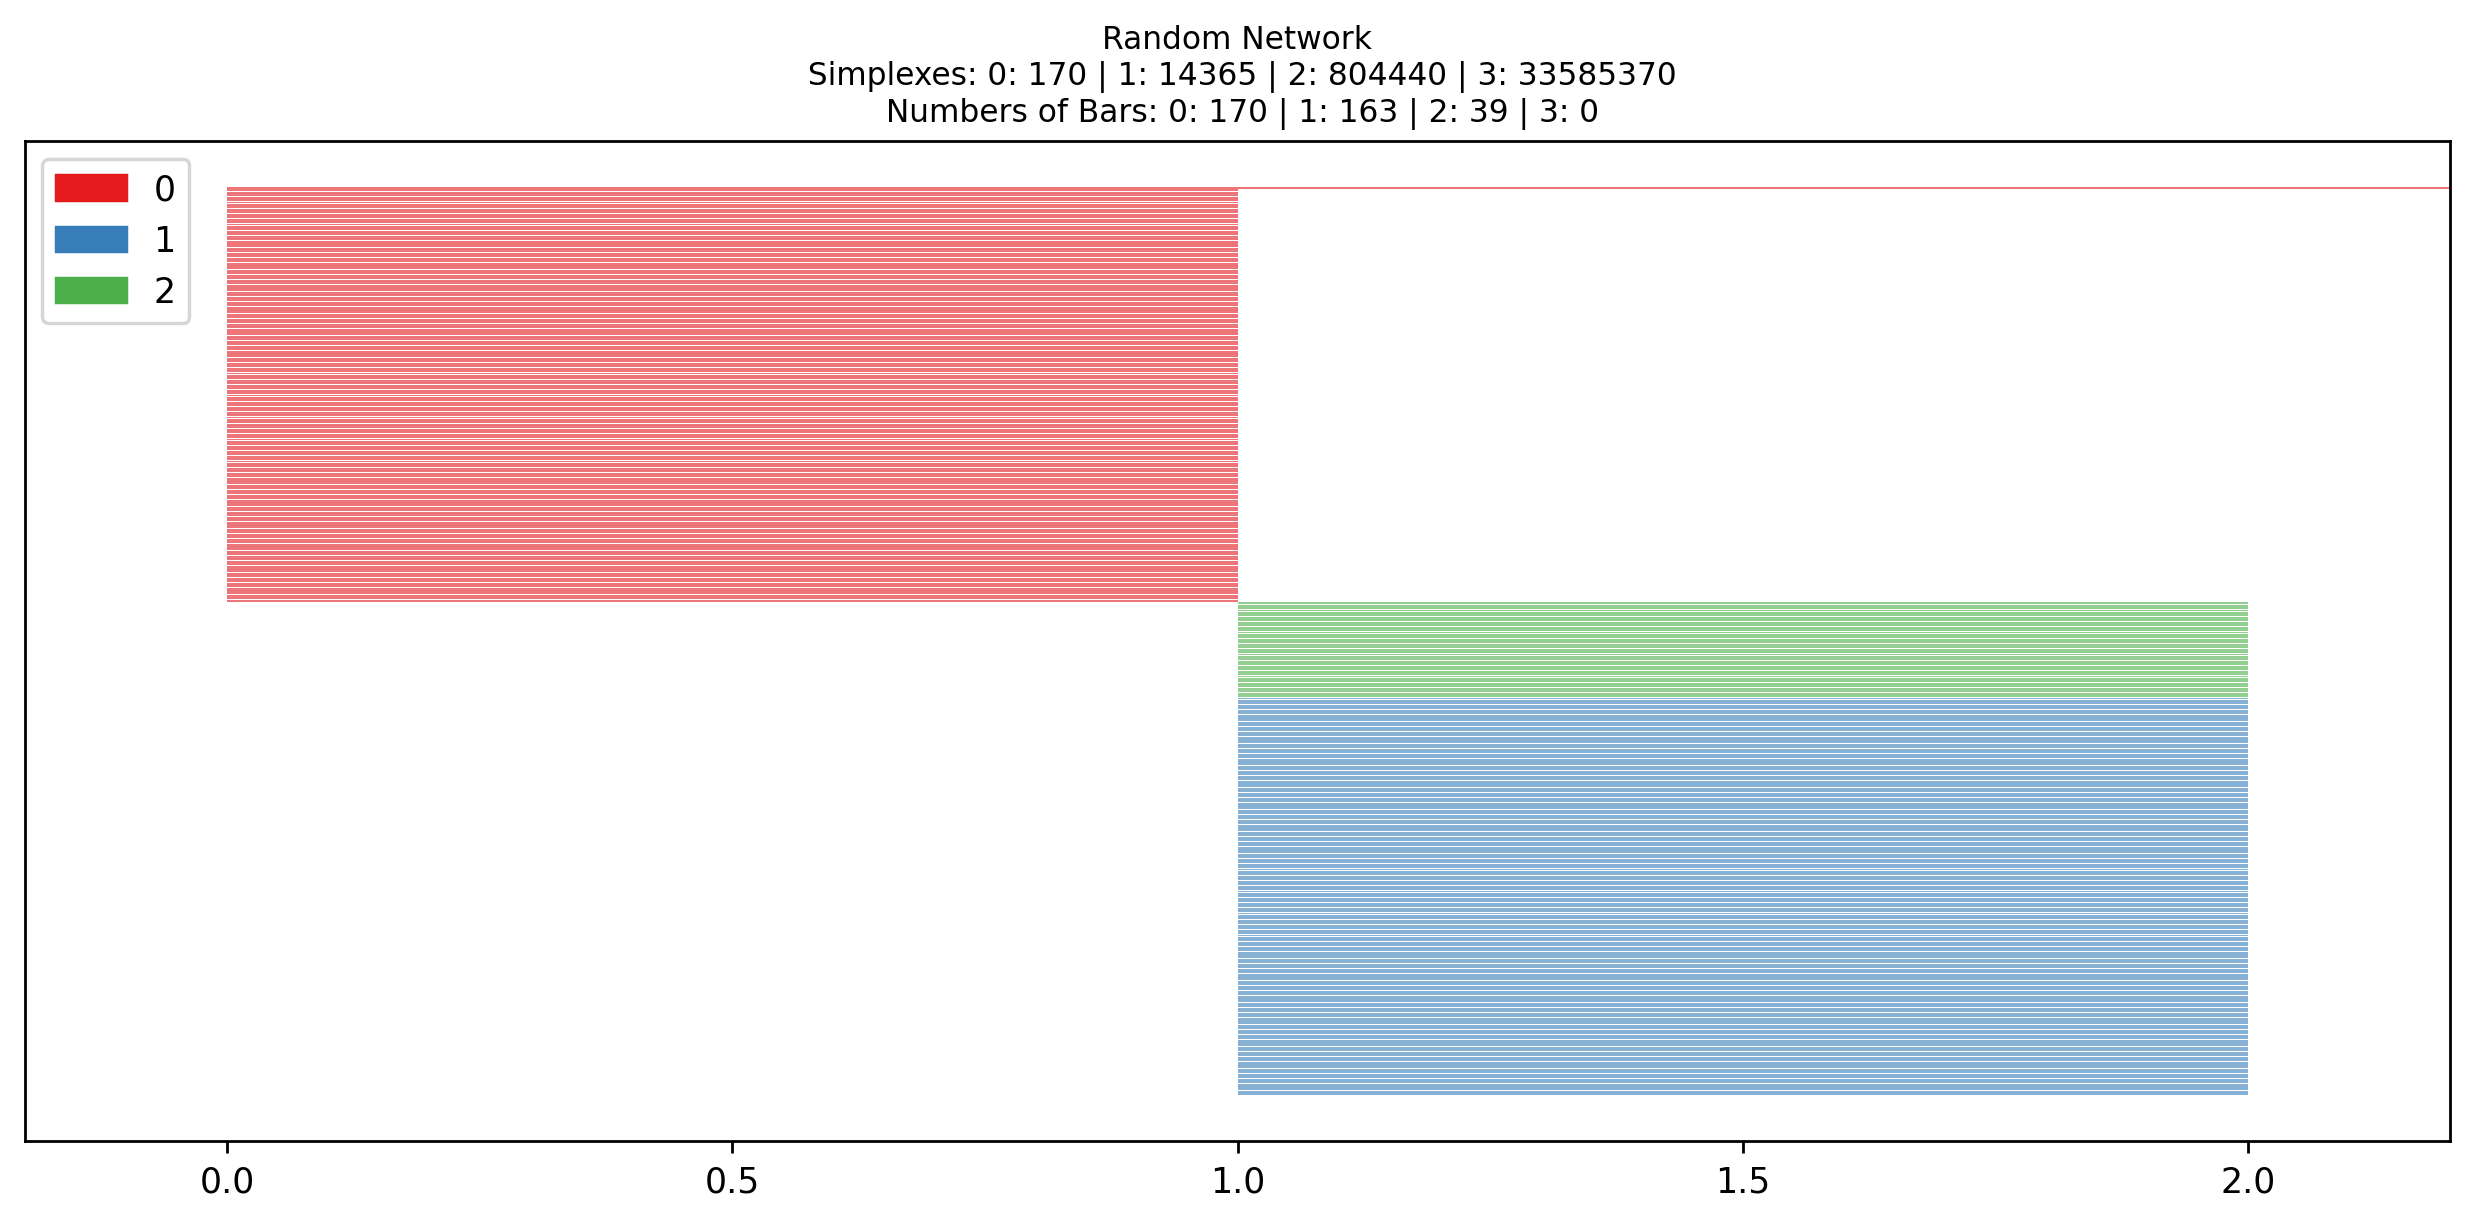

In [6]:
persistantHomologyFromNetworkWithRips(G_random_erdos,"Random Network",dim=3,plot=True)

# Removing one at the time

In [7]:
def removeNodesReturnLCC(G,removeSet):
    newG=G.copy()
    newG.remove_nodes_from(G.nodes&removeSet)
    newG=nx.subgraph(newG,max(nx.connected_components(newG),key=len))
    return newG

In [13]:
%%time
i=1
for node in sorted(G_random_erdos.nodes):
    if i%10 == 0:
        print(node)
    i+=1

    G=removeNodesReturnLCC(G_random_erdos,[node])
    persistantHomologyFromNetworkWithRips(G,"Random Network"+'-'+str(node),3,plot=False)

9
19
29
39
49
59
69
79
89
99
109
119
129
139
149
159
169
CPU times: total: 1h 53min 34s
Wall time: 2h 26min 13s
